In [1]:
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager

# Set up Splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)


In [2]:
# Visit the Mars Facts site
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

html = browser.html
html_soup = soup(html, 'html.parser')

In [9]:
import pandas as pd
df = pd.read_html('https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html')
df

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [10]:
mars_weather_data_df = df[0]
mars_weather_data_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [16]:
mars_weather_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1867 non-null   int64  
 1   terrestrial_date  1867 non-null   object 
 2   sol               1867 non-null   int64  
 3   ls                1867 non-null   int64  
 4   month             1867 non-null   int64  
 5   min_temp          1867 non-null   float64
 6   pressure          1867 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 102.2+ KB


In [51]:
mars_weather_data_df['terrestrial_date'] = pd.to_datetime(mars_weather_data_df['terrestrial_date'])
mars_weather_data_df['min_temp'] = mars_weather_data_df['min_temp'].astype('int64')
mars_weather_data_df['pressure'] = mars_weather_data_df['pressure'].astype('int64')
mars_weather_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   int64         
 6   pressure          1867 non-null   int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 102.2 KB


In [52]:
# How many months exist on Mars?
mars_weather_data_df['month'].nunique()

12

In [53]:
# How many Martian (and not Earth) days worth of data exist in the scraped dataset?
mars_weather_data_df['sol'].nunique()

1867

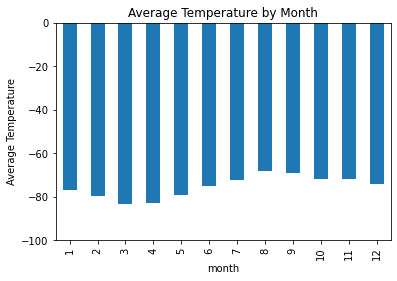

In [55]:
# What are the coldest and the warmest months on Mars (at the location of Curiosity)? Get the answer by averaging the minimum daily temperature of all the months. Plot the results as a bar chart.
import matplotlib.pyplot as plt
import numpy as np

month_average = mars_weather_data_df.groupby('month')['min_temp'].mean()
month_average.plot(kind="bar", title="Average Temperature by Month")
plt.ylabel('Average Temperature')
plt.ylim((-100,0))
plt.show()

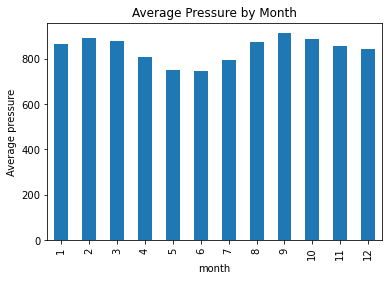

In [56]:
# Which months have the lowest and the highest atmospheric pressure on Mars? Get the answer by averaging the daily atmospheric pressure of all the months. Plot the results as a bar chart.
pressure_average = mars_weather_data_df.groupby('month')['pressure'].mean()
pressure_average.plot(kind="bar", title="Average Pressure by Month")
plt.ylabel('Average Pressure')
plt.show()

In [57]:
print(pressure_average)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


Text(0.5, 1.0, 'Mars Days Per Terrestrial Year')

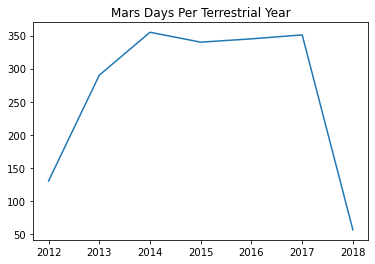

In [81]:
# About how many terrestrial (Earth) days exist in a Martian year? That is, in the time that Mars circles the Sun once, how many days elapse on Earth? Visually estimate the result by plotting the daily minimum temperature.
year = pd.DatetimeIndex(mars_weather_data_df['terrestrial_date']).year
count_per_year = mars_weather_data_df.groupby('year')['min_temp'].count()
plt.plot(count_per_year)
plt.title("Mars Days Per Terrestrial Year")

In [82]:
mars_weather_data_df.to_csv('mars_weather_data.csv')